In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%run code.py

In [9]:
X.shape

(37547, 37)

In [4]:
y.shape

(37547,)

In [59]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
%matplotlib inline

In [6]:
X_copy = X.copy()

In [7]:
chi2_selector = SelectKBest(chi2, k=10)
X_kbest = chi2_selector.fit_transform(X_copy, y)

In [12]:
X_kbest

array([[ 48., 991., 991., ...,  18., 991., 991.],
       [991., 991., 991., ..., 991., 991., 991.],
       [ 52., 144., 991., ...,  12., 991.,  14.],
       ...,
       [991., 991., 991., ..., 991., 991., 991.],
       [ 36., 993., 991., ...,  14., 991.,  14.],
       [ 24.,   8., 993., ...,  14., 991.,  16.]])

In [13]:
scores = chi2_selector.scores_

In [15]:
sorted(scores)

[0.0014263257557676867,
 0.3257519920971254,
 1.7929888650501813,
 3.6193210470367863,
 4.151784080738111,
 6.806644424573852,
 7.391825256023583,
 21.7836339726231,
 22.17564546577486,
 23.546960508837387,
 27.63951381629718,
 40.75726503591271,
 58.2157543617464,
 60.8602506498691,
 80.78280266456356,
 93.6748065675372,
 145.4211622190078,
 156.4105222307369,
 170.21038743258336,
 179.9850005379212,
 195.20288283017902,
 250.73605422813134,
 495.70548815414855,
 594.0655959782046,
 948.7358943002114,
 2227.879769003412,
 2395.7188961142783,
 2466.5662878022276,
 6144.9066954142645,
 8309.446803659132,
 16596.563464622956,
 16666.467870490575,
 21725.554867145056,
 29283.73070429921,
 40851.53512047081,
 62485.72854972982,
 213326.06074692204]

Random Forest on 37 features

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, dep, test_size=0.33, random_state=42)

In [122]:
X_train.shape

(25156, 37)

In [123]:
y_test.shape

(12391,)

In [124]:
y_train.shape

(25156,)

In [125]:
X.shape

(37547, 37)

In [126]:
dep = df[['AMDEYR']]

In [133]:
dep

1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
16       0
17       0
20       1
22       0
23       0
24       0
25       0
26       0
32       0
35       0
36       0
37       0
38       0
40       0
41       0
42       1
        ..
55224    0
55225    0
55226    0
55227    0
55228    0
55229    0
55231    0
55232    0
55234    0
55236    0
55237    0
55238    0
55240    0
55241    0
55242    0
55243    0
55244    0
55245    0
55247    0
55248    1
55250    0
55251    1
55252    0
55254    0
55256    0
55261    0
55262    0
55263    0
55265    0
55266    0
Name: AMDEYR, Length: 37547, dtype: int64

In [128]:
mask = dep[dep.AMDEYR == 2]
rows_to_change = list(mask.index.values)
dep.set_value(rows_to_change, 'AMDEYR',0)

/Users/shaked/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shaked/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/shaked/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:2584: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[index, col] = value


,AMDEYR
0,-9
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [129]:
dep = dep[dep.AMDEYR > -1]

In [130]:
dep = dep.T.squeeze()

In [134]:
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [135]:
confusion_matrix(y_test, predictions).ravel()

array([11329,    21,  1039,     2])

In [136]:
f1_score(y_test, predictions)

0.0037593984962406013

In [117]:
clf.feature_importances_ 

array([0.11772927, 0.04229496, 0.01752331, 0.0038531 , 0.00504206,
       0.0195513 , 0.01385724, 0.03119242, 0.02325817, 0.01665019,
       0.00769189, 0.04396662, 0.01387231, 0.01302343, 0.00473639,
       0.00834106, 0.00057081, 0.0086792 , 0.08570459, 0.05696304,
       0.02288936, 0.10903045, 0.0095189 , 0.0710508 , 0.00281017,
       0.01087994, 0.0116318 , 0.00727078, 0.00820871, 0.00326226,
       0.00291568, 0.00404757, 0.0603006 , 0.04557391, 0.02182683,
       0.02013015, 0.05415068])

In [137]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

Text(0.5,15,'False Positive Rate')

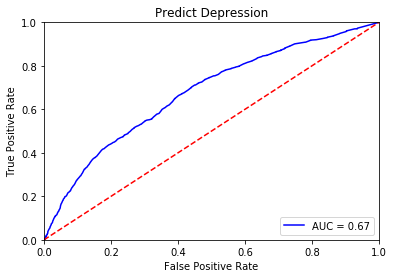

In [138]:
plt.title('Predict Depression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Random Forest on one feature

In [45]:
X1 = df[['ALCYDAYS']]

In [52]:
X1.shape

(37547, 1)

In [51]:
# Create a mask to remove rows 'Aged 12-17'
mask = y1[y1.AMDEYR < 0]
rows_to_remove = list(mask.index.values)
X1 = X1.drop(X1.index[rows_to_remove])

In [49]:
y1 = df[['AMDEYR']]

In [38]:
X1.shape

(55268, 1)

In [53]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.33, random_state=42)

In [54]:
clf1 = RandomForestClassifier()
clf1.fit(X_train1, y_train1)
predictions1 = clf1.predict(X_test1)

In [55]:
confusion_matrix(y_test1, predictions1).ravel()

array([    0,  1041,     0, 11350])

In [66]:
f1_score(y_test1, predictions1)

/Users/shaked/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [57]:
probs = clf1.predict_proba(X_test1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test1, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

Text(0.5,15,'False Positive Rate')

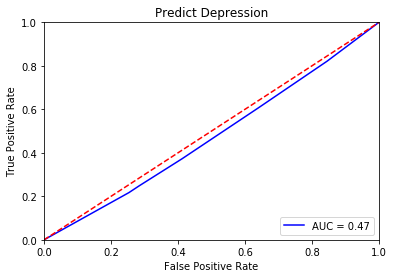

In [58]:
plt.title('Predict Depression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')